In [1]:
from pathlib import Path
from dataclasses import dataclass
import sys
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline
%load_ext autoreload
%autoreload 2


@dataclass
class Config:
    REPO_ROOT: Path = Path("../../")
    data_dir: Path = REPO_ROOT / "data"
    seed: int = 42


config = Config()
sys.path.append(str(config.REPO_ROOT))

/Users/shim-kojio/Documents/ramble/Interpretable_machine_learning_by_python/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 9.6.4 Examples

In [2]:
from python.src.preprocess import (
    preprocess_rfcc,
)

df_rfcc = pd.read_csv(config.data_dir / "risk_factors_cervical_cancer.csv")
df_rfcc_preprocessed = preprocess_rfcc(df=df_rfcc)
assert df_rfcc.shape[0] == df_rfcc_preprocessed.shape[0]

In [3]:
X = df_rfcc_preprocessed.drop("Biopsy", axis=1)
y = df_rfcc_preprocessed["Biopsy"].map({"Healthy": 0, "Cancer": 1})

model = RandomForestClassifier(n_estimators=100, random_state=config.seed)
model.fit(X, y)

explainer = shap.TreeExplainer(
    model, X, feature_perturbation="interventional", model_output="probability"
)
shap_values = explainer.shap_values(X)

In [4]:
i = 18
shap.initjs()
shap.force_plot(
    explainer.expected_value[1],
    shap_values[i][:, 1],
    X.iloc[i, :],
)

In [5]:
i = 6
shap.initjs()
shap.force_plot(
    explainer.expected_value[1],
    shap_values[i][:, 1],
    X.iloc[i, :],
)

### 9.6.5 SHAP Feature Importance

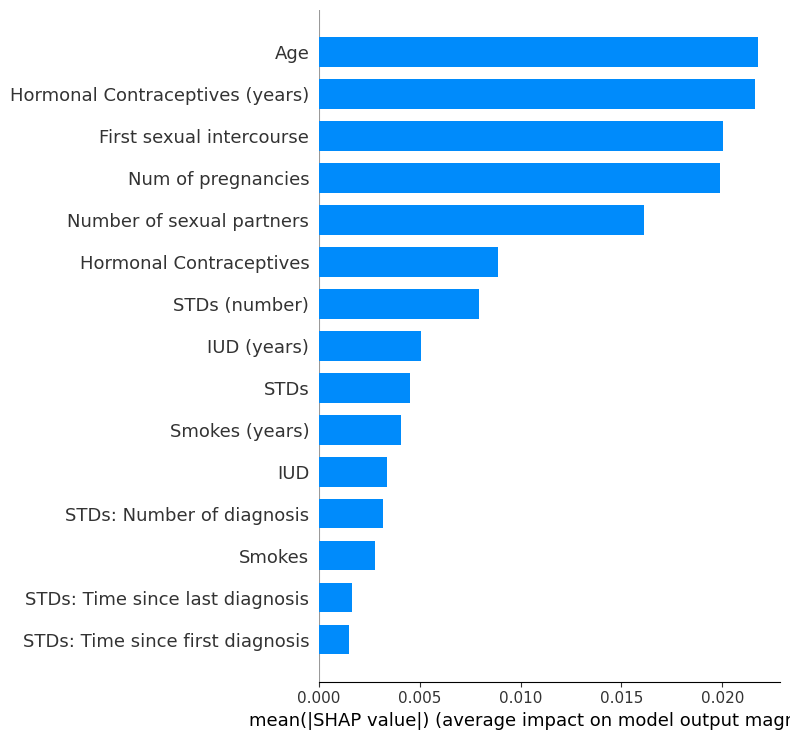

In [6]:
shap.initjs()
shap.summary_plot(shap_values[:, :, 1], X, plot_type="bar")

### 9.6.6 SHAP Summary Plot

- not working
    - https://github.com/shap/shap/issues/3951

In [7]:
shap.initjs()
shap.plots.beeswarm(shap_values[:, :, 1])

TypeError: The beeswarm plot requires an `Explanation` object as the `shap_values` argument.

### 9.6.7 SHAP Dependence Plot

In [8]:
cmap = plt.get_cmap("viridis", 40)
newcolors = [cmap(0.0), cmap(0.8), cmap(0.8)]
cmap2 = ListedColormap(newcolors)

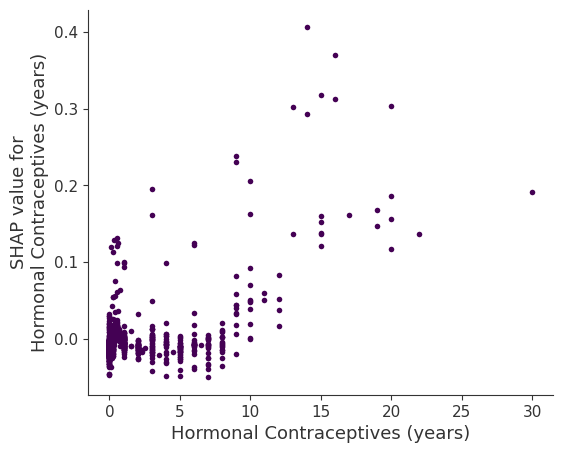

In [9]:
shap.initjs()
shap.dependence_plot(
    "Hormonal Contraceptives (years)",
    shap_values[:, :, 1],
    X,
    interaction_index=None,
    color=cmap2.colors[0],
)

### 9.6.8 SHAP Interaction Values

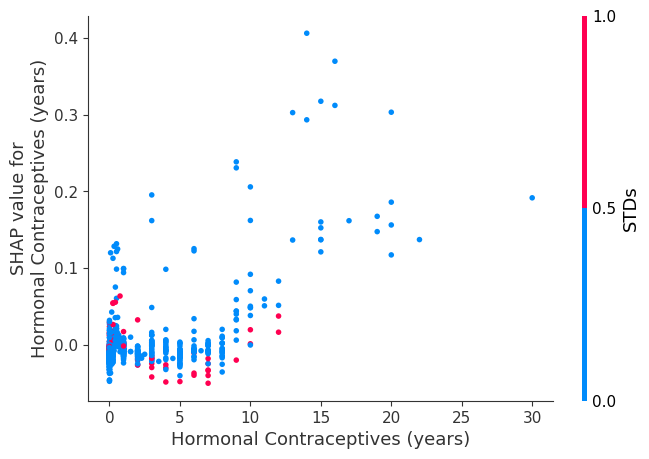

In [10]:
shap.initjs()
shap.dependence_plot(
    "Hormonal Contraceptives (years)",
    shap_values[:, :, 1],
    X,
    color=cmap2.colors[0],
)

### 9.6.9 Clustering Shapley Values

In [11]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[:, :, 1], X)